<a href="https://colab.research.google.com/github/NathHarshita/Codeever/blob/master/BitcoinPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

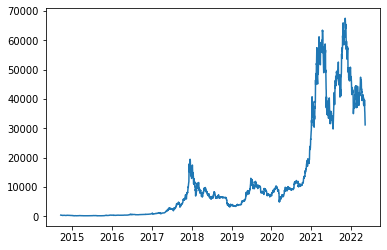

In [5]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [14]:
#Train test split

to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

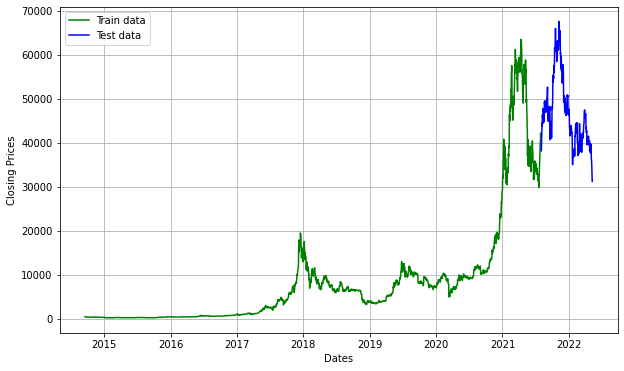

In [12]:
#split data into testing and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue' ,label='Test data')
plt.legend()

In [15]:
model_predictions = []
n_test_obser = len(testing_data)

In [27]:
from pandas.core.dtypes.cast import maybe_infer_to_datetimelike
for i in range(n_test_obser):
  model=ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output= model_fit.forecast()
  yhat= list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2790
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -22593.142
Method:                       css-mle   S.D. of innovations            795.492
Date:                Tue, 10 May 2022   AIC                          45198.283
Time:                        01:41:45   BIC                          45233.886
Sample:                             1   HQIC                         45211.137
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0437     15.298      0.787      0.431     -17.940      42.028
ar.L1.D.y     -0.0286      0.019     -1.511      0.131      -0.066       0.009
ar.L2.D.y     -0.0050      0.019     -0.263      0.7

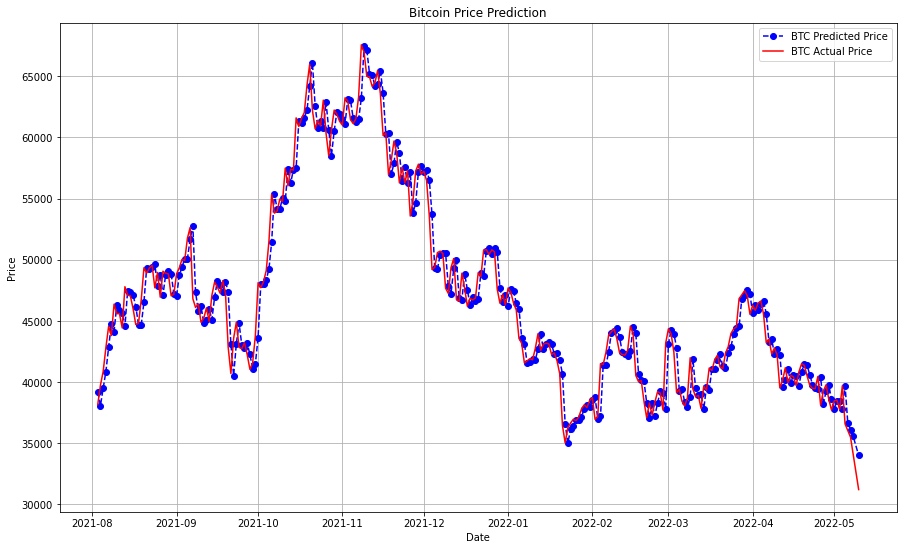

In [21]:
plt.figure(figsize = (15,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape)) #Mean Absolute Percentage Error

#Around 2.5% MAPE (Mean Absolute Percentage Error) implies the model is about 97.5% accurate in predicting the test set observation.

MAPE:0.025600088492594316


In [ ]:
#Mean Absolute Error
#Root Mean Square Error
#Mean Absolute Error